In [43]:
%pip install sqlite3 pandas matplotlib seaborn

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Connect db
connection = sqlite3.connect('currencies_db.db')

# Load db's table into pandas dataframe
query = "SELECT * FROM currencies"
df = pd.read_sql_query(query, connection)

# Close db connection
connection.close()

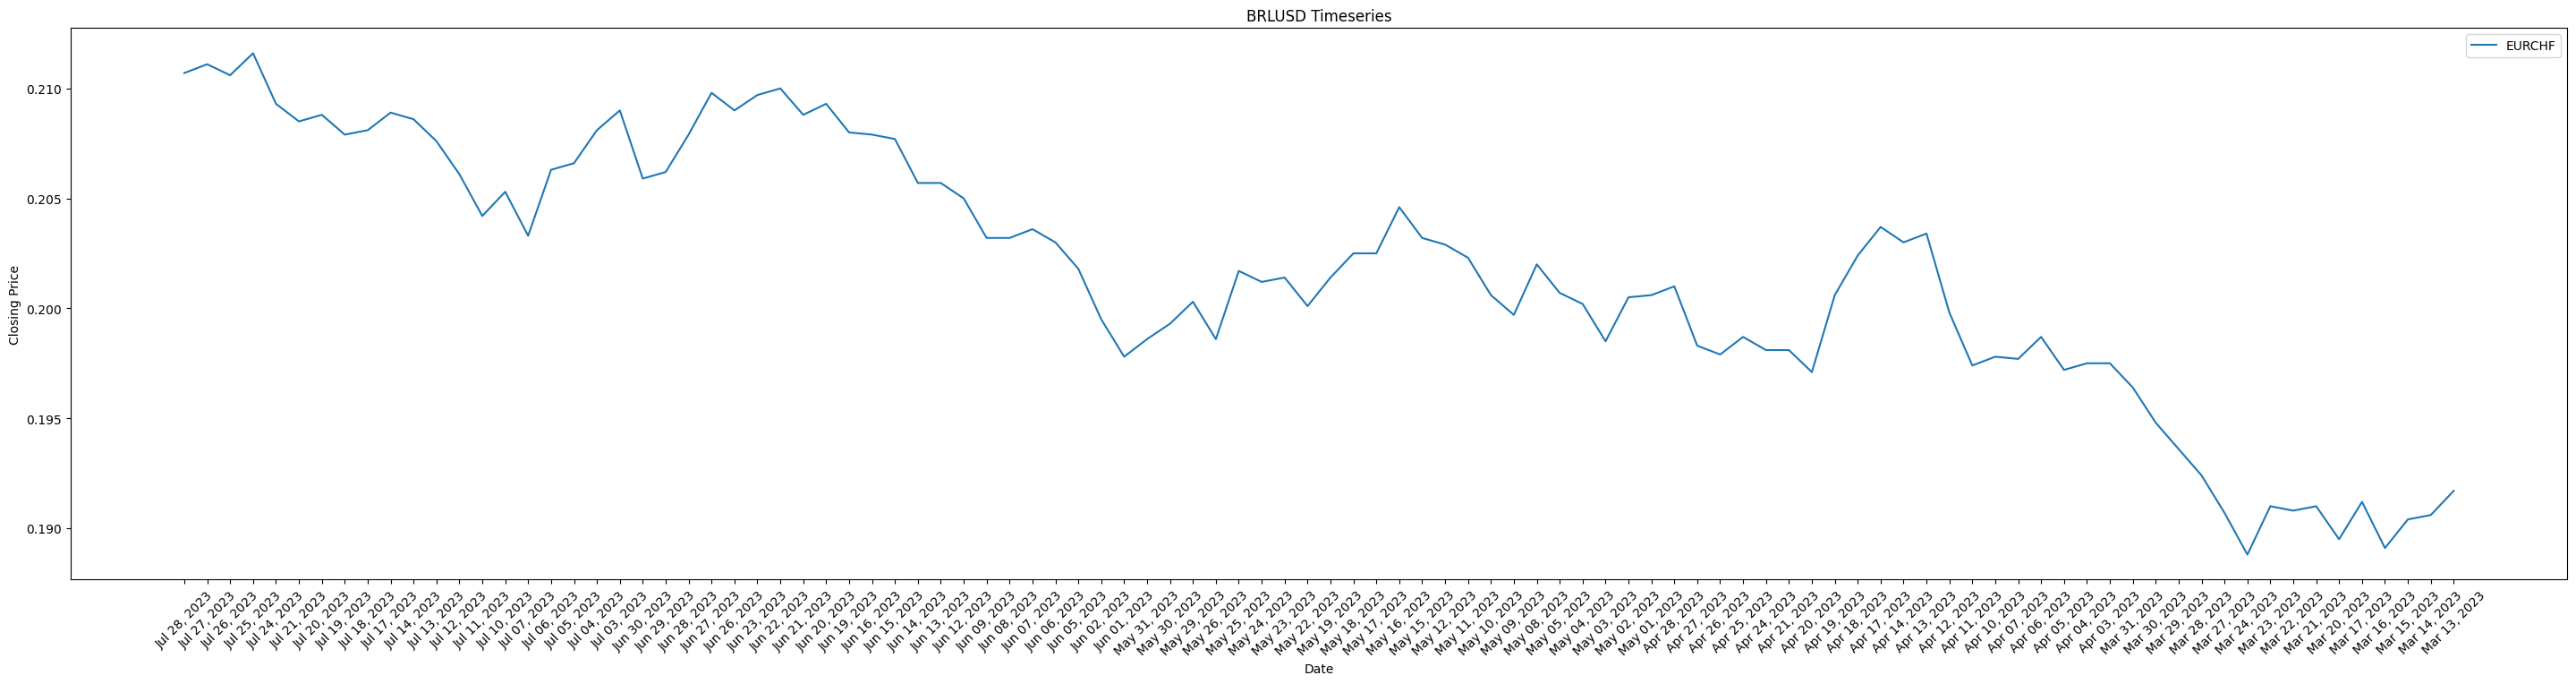

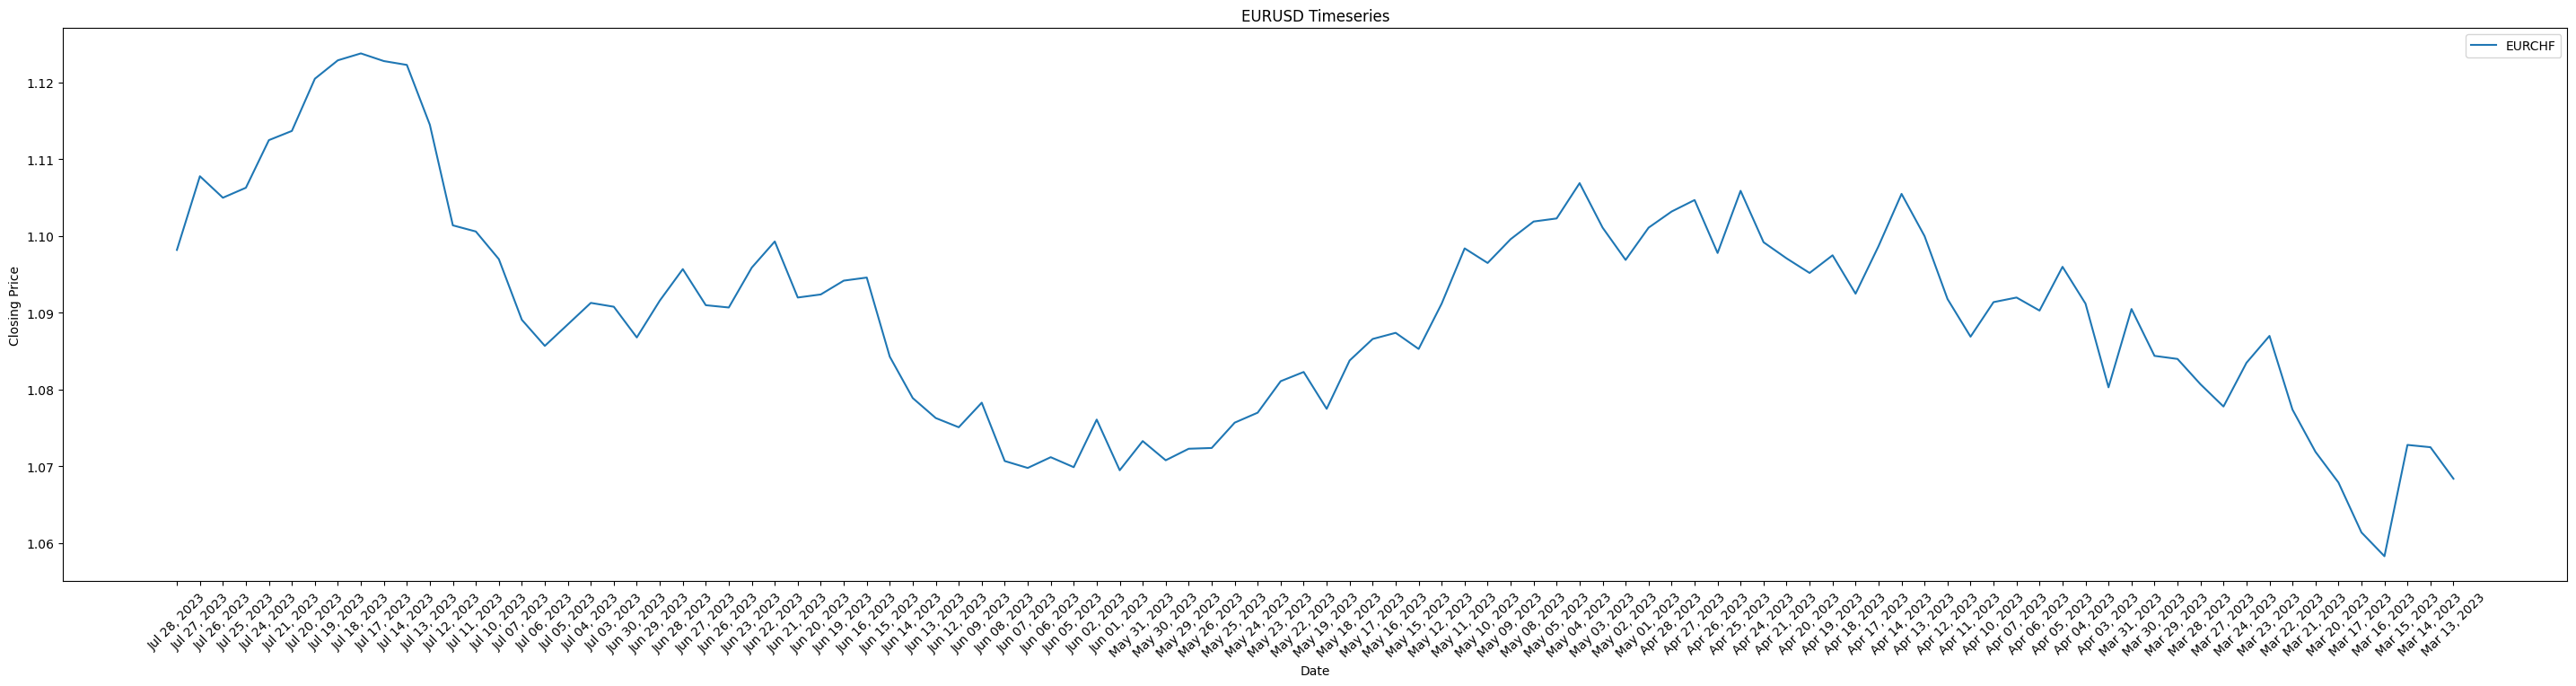

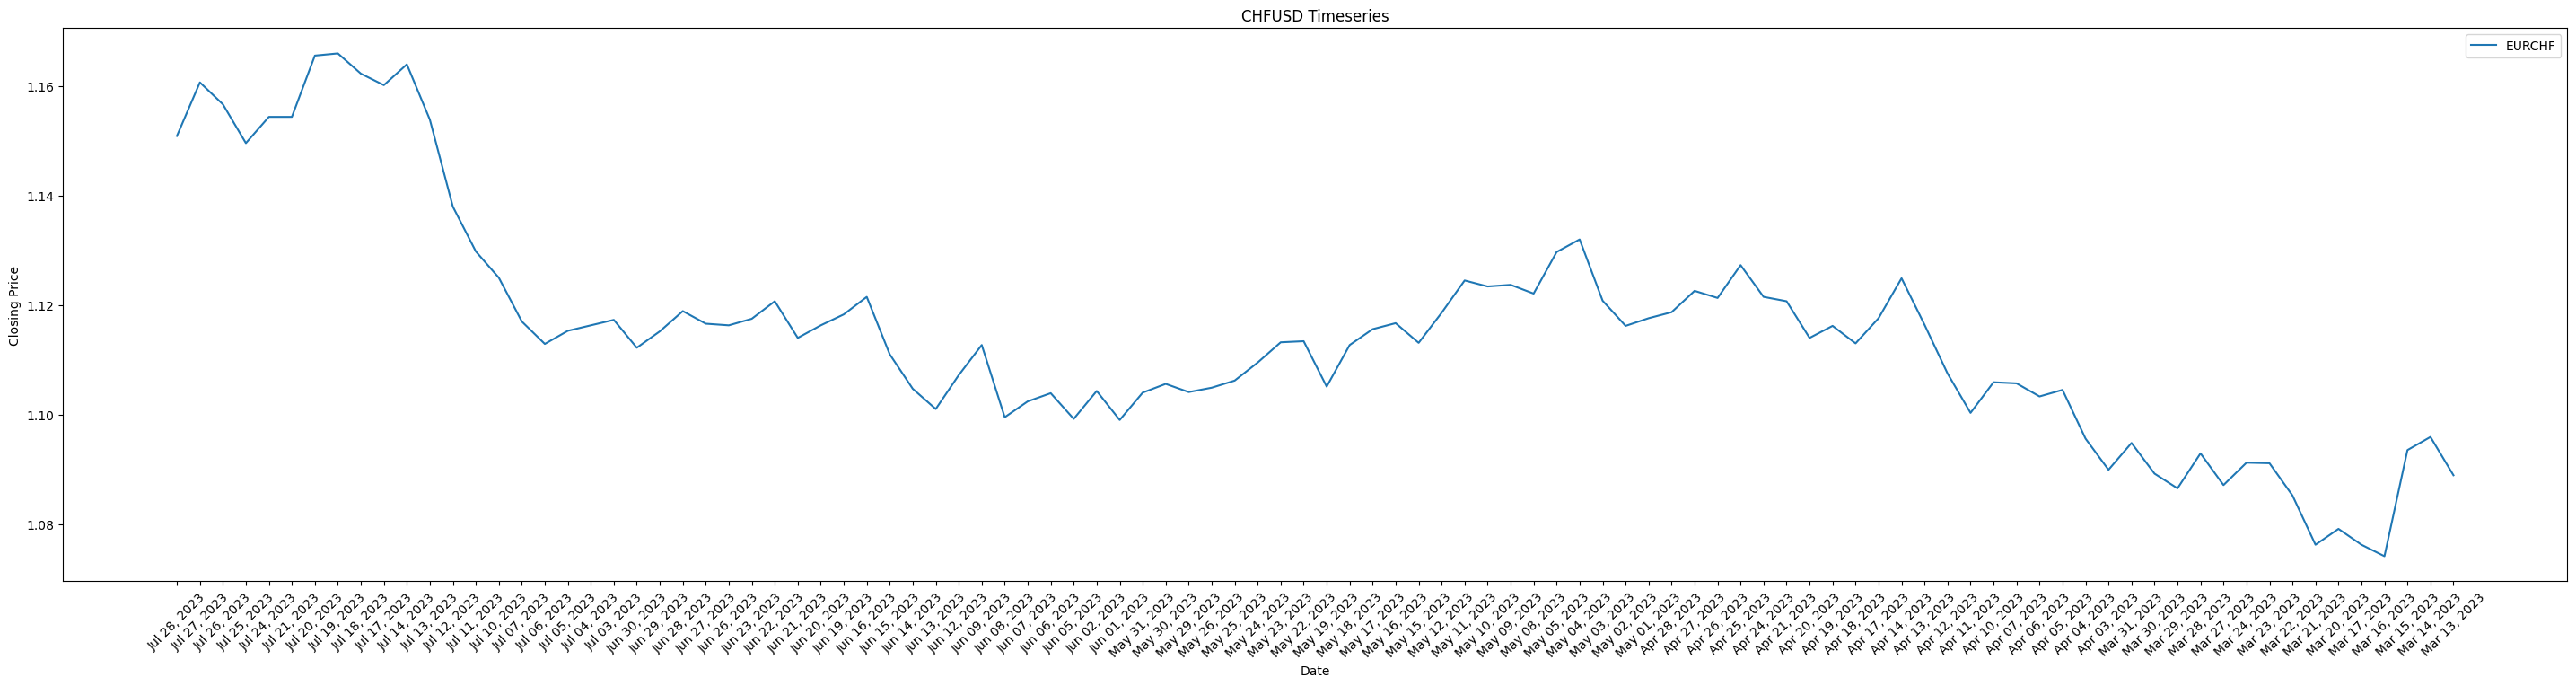

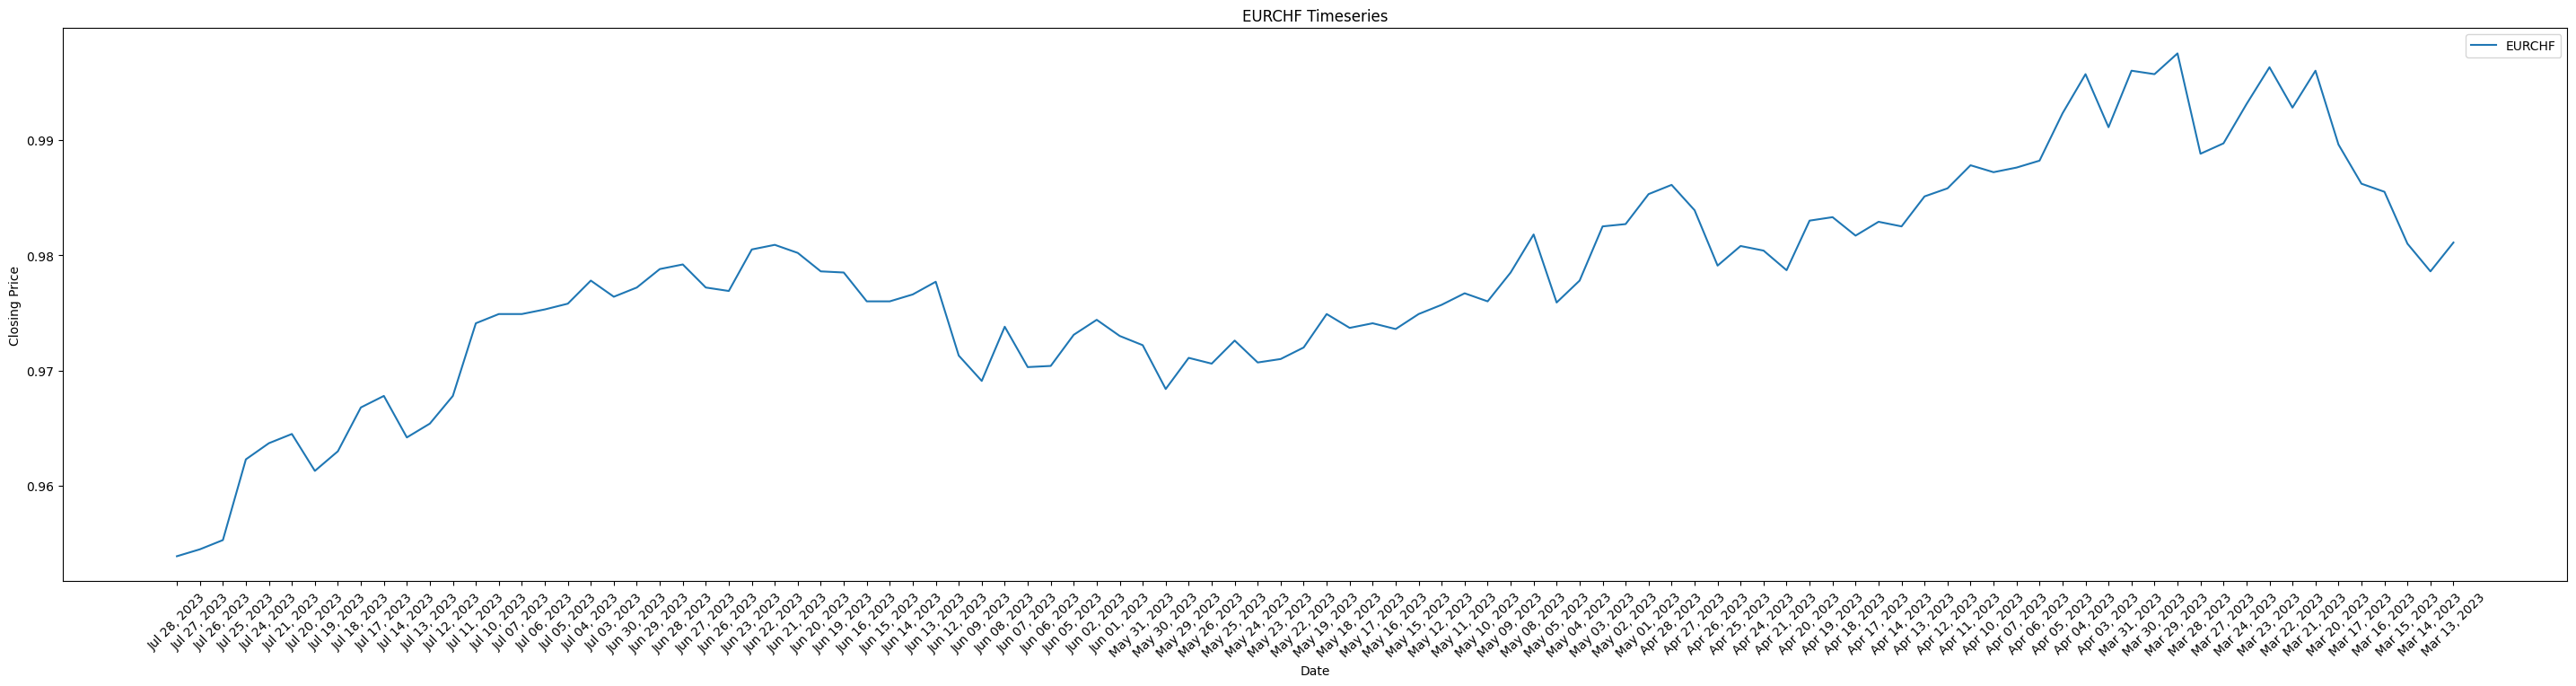

In [46]:
import matplotlib.pyplot as plt

currencies = df['ticker'].unique()

for currency_ticker in currencies:
    df_of_currency = df[df['ticker'] == currency_ticker]
    plt.figure(figsize=(36, 8))
    plt.plot(df_of_currency['date'], df_of_currency['close'], label=currency)
    #plt.figure(figsize=(10, 6))
    plt.title(f'{currency_ticker} Timeseries')
    plt.xlabel('Date')
    # Rotate Date subtitle
    plt.xticks(rotation=45)
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()


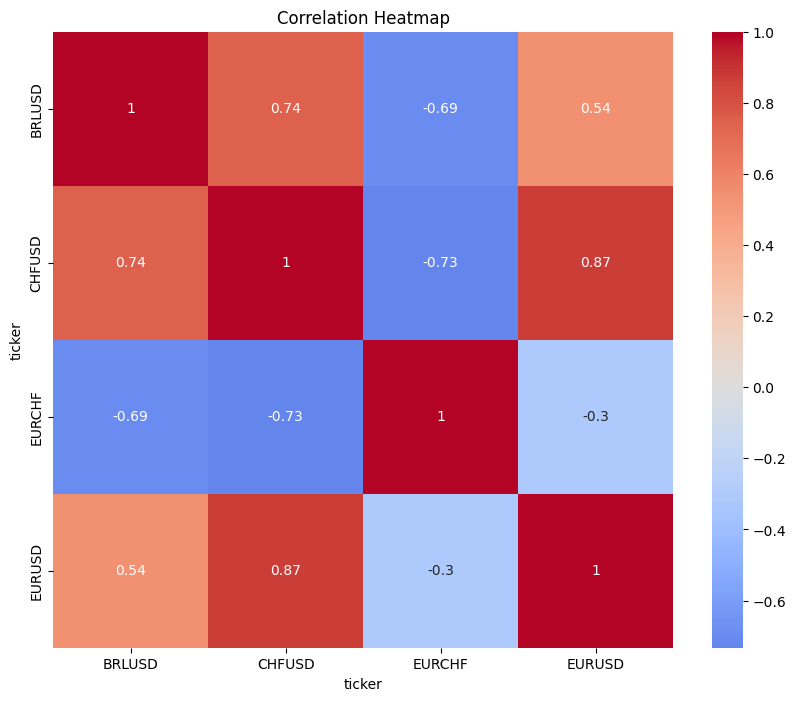

In [47]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.pivot_table(index='date', columns='ticker', values='close').corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()